<a href="https://colab.research.google.com/github/tmyok/Colaboratory/blob/master/GenerateTestImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

print("cv2:",cv2.__version__)
print("numpy:",np.__version__)

cv2: 4.1.2
numpy: 1.18.5


In [2]:
def sin_1d(length, period):
  return np.array(0.5*(1+np.sin(np.radians(np.arange(length)*360./period))))

In [3]:
def generate_sin_image(width, height, color, period):
  line = sin_1d(width, period)
  img = np.zeros((height, width, len(color)), np.uint8)
  for c, weight in enumerate(color):
    img[:, :, c] = weight * line
  return img

sin_image 0.1995084659929489 [msec]


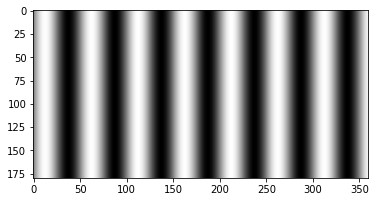

In [4]:
count = 1000
time1 = 0
for i in range(count):
  time_start = time.perf_counter()
  img1 = generate_sin_image(width=360, height=180, color=(255,255,255), period=50)
  time_end = time.perf_counter()
  time1 += (time_end-time_start)*1000

print("sin_image", time1/count, "[msec]")
plt.imshow(img1)

In [5]:
def generate_cross_image(width, height, color, period):
  x_line = sin_1d(width, period).reshape(1,-1)
  y_line = sin_1d(height, period).reshape(-1,1)
  tmp_map = y_line * x_line

  img = np.zeros((height, width, len(color)), np.uint8)
  for c, weight in enumerate(color):
    img[:, :, c] = weight * tmp_map
  return img

generate_cross_image 0.6488123999906747 [msec]


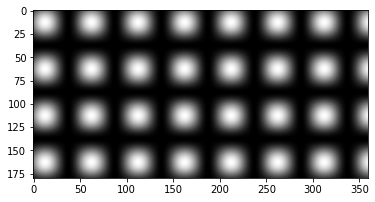

In [6]:
count = 1000
time2 = 0
for i in range(count):
  time_start = time.perf_counter()
  img2 = generate_cross_image(width=360, height=180, color=(255,255,255), period=50)
  time_end = time.perf_counter()
  time2 += (time_end-time_start)*1000

print("generate_cross_image", time2/count, "[msec]")
plt.imshow(img2)